<a href="https://colab.research.google.com/github/plaban1981/Deep-Learning-KERAS/blob/master/Age_Category_Classification_using_Tensorflow_Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mount Drive on Colab as the images are stored in the drive

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


## Data Preprocessing - eye images

In [2]:
import pandas as pd
import os
final_images = pd.read_csv("/content/final_images_new_images.csv")
final_images.shape

FileNotFoundError: ignored

In [5]:
final_images.head()

,image_path,Eye_image_path,age,gender,race
0,crop_part1/3_1_0_20170109191958848.jpg.chip.jpg,New_Eye_Images/3_1_0_20170109191958848_resized...,3,1,0
1,crop_part1/3_1_0_20170109192003664.jpg.chip.jpg,New_Eye_Images/3_1_0_20170109192003664_resized...,3,1,0
2,crop_part1/3_1_0_20170109192006973.jpg.chip.jpg,New_Eye_Images/3_1_0_20170109192006973_resized...,3,1,0
3,crop_part1/3_1_0_20170109192027975.jpg.chip.jpg,New_Eye_Images/3_1_0_20170109192027975_resized...,3,1,0
4,crop_part1/3_1_0_20170109192130439.jpg.chip.jpg,New_Eye_Images/3_1_0_20170109192130439_resized...,3,1,0


In [4]:
img_path = "/content/drive/MyDrive/Qualcom/Eye Dataset - New Images"
folders = os.listdir(img_path)
len(folders)

6

In [14]:
files = []
for folder in folders:
  print(folder)
  if folder in ["folder 17 cleaned","folder 18 cleaned"]:
    sub_folder = os.listdir(os.path.join(img_path,folder))
    print(sub_folder)
    for fld in sub_folder:
      f = os.listdir(os.path.join(img_path,folder,fld))
      print(len(f))
      for item in f:
        files.append(item)
  else:
    f = os.listdir(os.path.join(img_path,folder))
    print(len(f))
    for item in f:
      files.append(item)


folder 0 cleaned
906
folder 12
582
folder 4 cleaned
888
folder 13
621
folder 18 cleaned
['folder 18']
389
folder 17 cleaned
['folder 17']
618


In [15]:
len(files)

4004

In [17]:
new_images =  pd.DataFrame({'Eye_image_path':files})

In [18]:
new_images.head()

,Eye_image_path
0,10_1_0_20170109204617417_resized.jpg
1,13_1_3_20170109213029072_resized.jpg
2,15_0_3_20170104225537649_resized.jpg
3,12_0_0_20170110225257257_resized.jpg
4,16_0_0_20170110231520320_resized.jpg


In [19]:
new_images['Eye_image_path'] = "New_Eye_Images/"+new_images['Eye_image_path']
new_images.head()

,Eye_image_path
0,New_Eye_Images/10_1_0_20170109204617417_resize...
1,New_Eye_Images/13_1_3_20170109213029072_resize...
2,New_Eye_Images/15_0_3_20170104225537649_resize...
3,New_Eye_Images/12_0_0_20170110225257257_resize...
4,New_Eye_Images/16_0_0_20170110231520320_resize...


In [20]:
final_new_images_df = pd.merge(final_images,new_images,on='Eye_image_path',how='inner')
final_new_images_df.shape

(5885, 5)

In [21]:
final_new_images_df.drop_duplicates()

,image_path,Eye_image_path,age,gender,race
0,crop_part1/3_1_0_20170109191958848.jpg.chip.jpg,New_Eye_Images/3_1_0_20170109191958848_resized...,3,1,0
1,UTKFace/3_1_0_20170109191958848.jpg.chip.jpg,New_Eye_Images/3_1_0_20170109191958848_resized...,3,1,0
2,crop_part1/3_1_0_20170109192003664.jpg.chip.jpg,New_Eye_Images/3_1_0_20170109192003664_resized...,3,1,0
3,UTKFace/3_1_0_20170109192003664.jpg.chip.jpg,New_Eye_Images/3_1_0_20170109192003664_resized...,3,1,0
4,crop_part1/3_1_0_20170109192006973.jpg.chip.jpg,New_Eye_Images/3_1_0_20170109192006973_resized...,3,1,0
...,...,...,...,...,...
5880,UTKFace/36_1_1_20170113000218202.jpg.chip.jpg,New_Eye_Images/36_1_1_20170113000218202_resize...,36,1,1
5881,UTKFace/36_1_1_20170113000341643.jpg.chip.jpg,New_Eye_Images/36_1_1_20170113000341643_resize...,36,1,1
5882,UTKFace/36_1_1_20170113000229769.jpg.chip.jpg,New_Eye_Images/36_1_1_20170113000229769_resize...,36,1,1
5883,UTKFace/36_1_1_20170113000937962.jpg.chip.jpg,New_Eye_Images/36_1_1_20170113000937962_resize...,36,1,1


In [23]:
final = final_new_images_df.drop('image_path',axis=1)
final = final.drop_duplicates()
final.shape

(4001, 4)

In [24]:
final.head()

,Eye_image_path,age,gender,race
0,New_Eye_Images/3_1_0_20170109191958848_resized...,3,1,0
2,New_Eye_Images/3_1_0_20170109192003664_resized...,3,1,0
4,New_Eye_Images/3_1_0_20170109192006973_resized...,3,1,0
6,New_Eye_Images/3_1_0_20170109192027975_resized...,3,1,0
8,New_Eye_Images/3_1_0_20170109192130439_resized...,3,1,0


In [22]:
final_new_images_df.to_csv("new_images_processed.csv",index=False)

In [6]:
import pandas as pd
final = pd.read_csv("/content/new_images_processed.csv")
final.head()

,image_path,Eye_image_path,age,gender,race
0,crop_part1/3_1_0_20170109191958848.jpg.chip.jpg,New_Eye_Images/3_1_0_20170109191958848_resized...,3,1,0
1,UTKFace/3_1_0_20170109191958848.jpg.chip.jpg,New_Eye_Images/3_1_0_20170109191958848_resized...,3,1,0
2,crop_part1/3_1_0_20170109192003664.jpg.chip.jpg,New_Eye_Images/3_1_0_20170109192003664_resized...,3,1,0
3,UTKFace/3_1_0_20170109192003664.jpg.chip.jpg,New_Eye_Images/3_1_0_20170109192003664_resized...,3,1,0
4,crop_part1/3_1_0_20170109192006973.jpg.chip.jpg,New_Eye_Images/3_1_0_20170109192006973_resized...,3,1,0


In [7]:
final.shape

(5885, 5)

In [8]:
final = final.drop('image_path',axis=1)
final = final.drop_duplicates()
final.shape

(4001, 4)

#create train test split

In [17]:
Y = final['gender']

In [18]:
 from sklearn.model_selection import train_test_split
 X_train,X_test =  train_test_split(final,test_size=0.30,stratify=Y,random_state=42)

In [19]:
X_train.shape,X_test.shape

((2800, 4), (1201, 4))

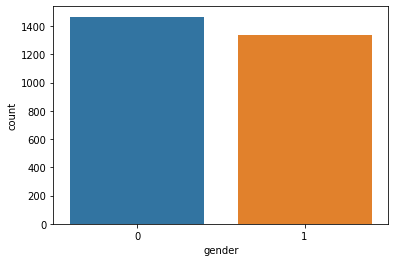

In [12]:
import seaborn as sns 
sns.countplot(x='gender',data=X_train)

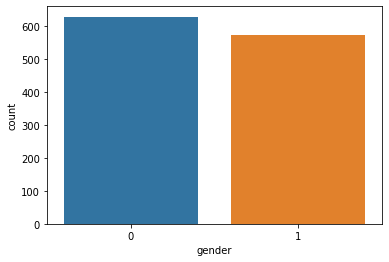

In [13]:
sns.countplot(x='gender',data=X_test)

In [22]:
X_train.head()

,Eye_image_path,age,gender,race
5820,New_Eye_Images/62_0_2_20170112221952114_resize...,62,0,2
68,New_Eye_Images/3_1_1_20170109190807350_resized...,3,1,1
1392,New_Eye_Images/56_1_1_20170110153339650_resize...,56,1,1
4137,New_Eye_Images/25_1_3_20170119171920688_resize...,25,1,3
3026,New_Eye_Images/11_1_3_20170104222911112_resize...,11,1,3


In [23]:
train_path = "/content/drive/MyDrive/Qualcom/Eye_Train_Images"
test_path = "/content/drive/MyDrive/Qualcom/Eye_Test_Images"

In [16]:
train_files  = os.listdir(train_path)
train_files[:5]

['5_1_0_20161219153633244_resized.jpg',
 '25_0_1_20170117183525355_resized.jpg',
 '40_0_2_20170117000400201_resized.jpg',
 '16_0_0_20170110232039461_resized.jpg',
 '36_1_1_20170113012408913_resized.jpg']

In [24]:
import shutil
for item in X_train['Eye_image_path'].values.tolist():
  source = os.path.join("/content/drive/MyDrive/Qualcom/",item)
  shutil.copy(source,train_path)


In [25]:
len(os.listdir(train_path))

2800

In [26]:
from tqdm import tqdm
for item in tqdm(X_test['Eye_image_path'].values.tolist()):
  source = os.path.join("/content/drive/MyDrive/Qualcom/",item)
  shutil.copy(source,test_path)

100%|██████████| 1201/1201 [10:14<00:00,  1.95it/s]


In [27]:
len(os.listdir(test_path))

1201

In [28]:
X_train.to_csv('train.csv',index=False)
X_test.to_csv('test.csv',index=False)

In [29]:
from google.colab import files
files.download('train.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [30]:
files.download('test.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Import Necessary Libraries

In [7]:
import os, warnings
import matplotlib.pyplot as plt
from matplotlib import gridspec
import pandas as pd

import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory
#
import warnings
warnings.filterwarnings('ignore')
# 
print(tf.__version__)

2.8.2


In [4]:
train_path = "/content/drive/MyDrive/Qualcom/Eye_Train_Images"
test_path = "/content/drive/MyDrive/Qualcom/Eye_Test_Images"

In [8]:
train_df = pd.read_csv("/content/drive/MyDrive/Qualcom/train.csv")
test_df = pd.read_csv("/content/drive/MyDrive/Qualcom/test.csv")

In [9]:
train_df.head()

,Eye_image_path,age,gender,race
0,New_Eye_Images/62_0_2_20170112221952114_resize...,62,0,2
1,New_Eye_Images/3_1_1_20170109190807350_resized...,3,1,1
2,New_Eye_Images/56_1_1_20170110153339650_resize...,56,1,1
3,New_Eye_Images/25_1_3_20170119171920688_resize...,25,1,3
4,New_Eye_Images/11_1_3_20170104222911112_resize...,11,1,3


In [10]:
test_df.head()

,Eye_image_path,age,gender,race
0,New_Eye_Images/25_1_3_20170117152000516_resize...,25,1,3
1,New_Eye_Images/64_0_2_20170116193321184_resize...,64,0,2
2,New_Eye_Images/5_0_0_20170110220356210_resized...,5,0,0
3,New_Eye_Images/59_0_0_20170109012750162_resize...,59,0,0
4,New_Eye_Images/26_0_0_20170113210127277_resize...,26,0,0


## Process Geneder data

In [11]:
def clean_image(x):
  return x.split("/")[-1]

In [12]:
train_gender = train_df.drop(['age','race'],axis=1)
test_gender = test_df.drop(['age','race'],axis=1)

In [13]:
train_gender.head()

,Eye_image_path,gender
0,New_Eye_Images/62_0_2_20170112221952114_resize...,0
1,New_Eye_Images/3_1_1_20170109190807350_resized...,1
2,New_Eye_Images/56_1_1_20170110153339650_resize...,1
3,New_Eye_Images/25_1_3_20170119171920688_resize...,1
4,New_Eye_Images/11_1_3_20170104222911112_resize...,1


In [14]:
train_gender['Eye_image_path'] = train_gender['Eye_image_path'].map(clean_image)

In [15]:
test_gender['Eye_image_path'] = test_gender['Eye_image_path'].map(clean_image)

In [16]:
train_gender.head()

,Eye_image_path,gender
0,62_0_2_20170112221952114_resized.jpg,0
1,3_1_1_20170109190807350_resized.jpg,1
2,56_1_1_20170110153339650_resized.jpg,1
3,25_1_3_20170119171920688_resized.jpg,1
4,11_1_3_20170104222911112_resized.jpg,1


In [26]:
train_gender = train_gender.rename(columns={'gender':'label'})

In [27]:
train_gender.head()

,Eye_image_path,label
0,62_0_2_20170112221952114_resized.jpg,0
1,3_1_1_20170109190807350_resized.jpg,1
2,56_1_1_20170110153339650_resized.jpg,1
3,25_1_3_20170119171920688_resized.jpg,1
4,11_1_3_20170104222911112_resized.jpg,1


In [30]:
train_gender['label'] = train_gender['label'].astype('str')

In [31]:
train_gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Eye_image_path  2800 non-null   object
 1   label           2800 non-null   object
dtypes: object(2)
memory usage: 43.9+ KB


In [17]:
test_gender.head()

,Eye_image_path,gender
0,25_1_3_20170117152000516_resized.jpg,1
1,64_0_2_20170116193321184_resized.jpg,0
2,5_0_0_20170110220356210_resized.jpg,0
3,59_0_0_20170109012750162_resized.jpg,0
4,26_0_0_20170113210127277_resized.jpg,0


## Reproducability

In [5]:
def set_seed(seed=31415):
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
set_seed(31415)

## Data Augmentation

In [28]:
TRAIN_DIR = train_path
TEST_DIR = test_path

In [24]:
train_datagen = ImageDataGenerator(
        rescale=1 / 255.0,
        rotation_range=20,
        zoom_range=0.05,
        width_shift_range=0.05,
        height_shift_range=0.05,
        shear_range=0.05,
        horizontal_flip=True,
        fill_mode="nearest",
        validation_split=0.20)

test_datagen = ImageDataGenerator(rescale=1 / 255.0)

In [32]:
batch_size = 8
image_size = (224,224)
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_gender,
    directory=TRAIN_DIR,
    x_col="Eye_image_path",
    y_col="label",
    target_size=image_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset='training',
    shuffle=True,
    seed=42
)
valid_generator = train_datagen.flow_from_dataframe(
    dataframe=train_gender,
    directory=TRAIN_DIR,
    x_col="Eye_image_path",
    y_col="label",
    target_size=image_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset='validation',
    shuffle=True,
    seed=42
)
test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_gender,
    directory=TEST_DIR,
    x_col="Eye_image_path",
    target_size=image_size,
    batch_size=1,
    class_mode=None,
    shuffle=False,
)

Found 2240 validated image filenames belonging to 2 classes.
Found 560 validated image filenames belonging to 2 classes.
Found 1201 validated image filenames.


## Use When Images have class as subfolders

In [ ]:
train_generator = datagen.flow_from_directory(
    TRAIN_DIR, 
    subset='training',
    class_mode='categorical',
    target_size=(224, 224),
    batch_size=8,
    shuffle=True
)

val_generator = datagen.flow_from_directory(
    TRAIN_DIR,
    subset='validation',
    class_mode='categorical',
    target_size=(224, 224),
    batch_size=8,
    shuffle=False
)
TEST_DIR = "/content/drive/MyDrive/Qualcom/Test_Data"
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    class_mode=None,
    target_size=(224, 224),
    batch_size=1,
    shuffle=False
)

Found 7087 images belonging to 6 classes.
Found 1768 images belonging to 6 classes.
Found 3178 images belonging to 1 classes.


## Some ImageDataGenerator properities

In [33]:
print(train_generator.class_indices)

{'0': 0, '1': 1}


In [35]:
print(valid_generator.class_indices)

{'0': 0, '1': 1}


In [36]:
print(train_generator.samples)

2240


In [38]:
print(valid_generator.samples)

560


In [39]:
type(train_generator)

keras.preprocessing.image.DataFrameIterator

In [40]:
len(train_generator.labels)

2240

In [41]:
train_generator.filenames[:5]

['12_0_0_20170110225028524_resized.jpg',
 '39_0_1_20170116011220421_resized.jpg',
 '25_0_3_20170119153857705_resized.jpg',
 '3_0_1_20170110213455106_resized.jpg',
 '39_1_4_20170104204507323_resized.jpg']

In [42]:
train_generator.filepaths[:5]

['/content/drive/MyDrive/Qualcom/Eye_Train_Images/12_0_0_20170110225028524_resized.jpg',
 '/content/drive/MyDrive/Qualcom/Eye_Train_Images/39_0_1_20170116011220421_resized.jpg',
 '/content/drive/MyDrive/Qualcom/Eye_Train_Images/25_0_3_20170119153857705_resized.jpg',
 '/content/drive/MyDrive/Qualcom/Eye_Train_Images/3_0_1_20170110213455106_resized.jpg',
 '/content/drive/MyDrive/Qualcom/Eye_Train_Images/39_1_4_20170104204507323_resized.jpg']

In [43]:
len(valid_generator.labels)

560

## Retrieve true values from validation dataset

In [46]:
y_val = valid_generator.labels

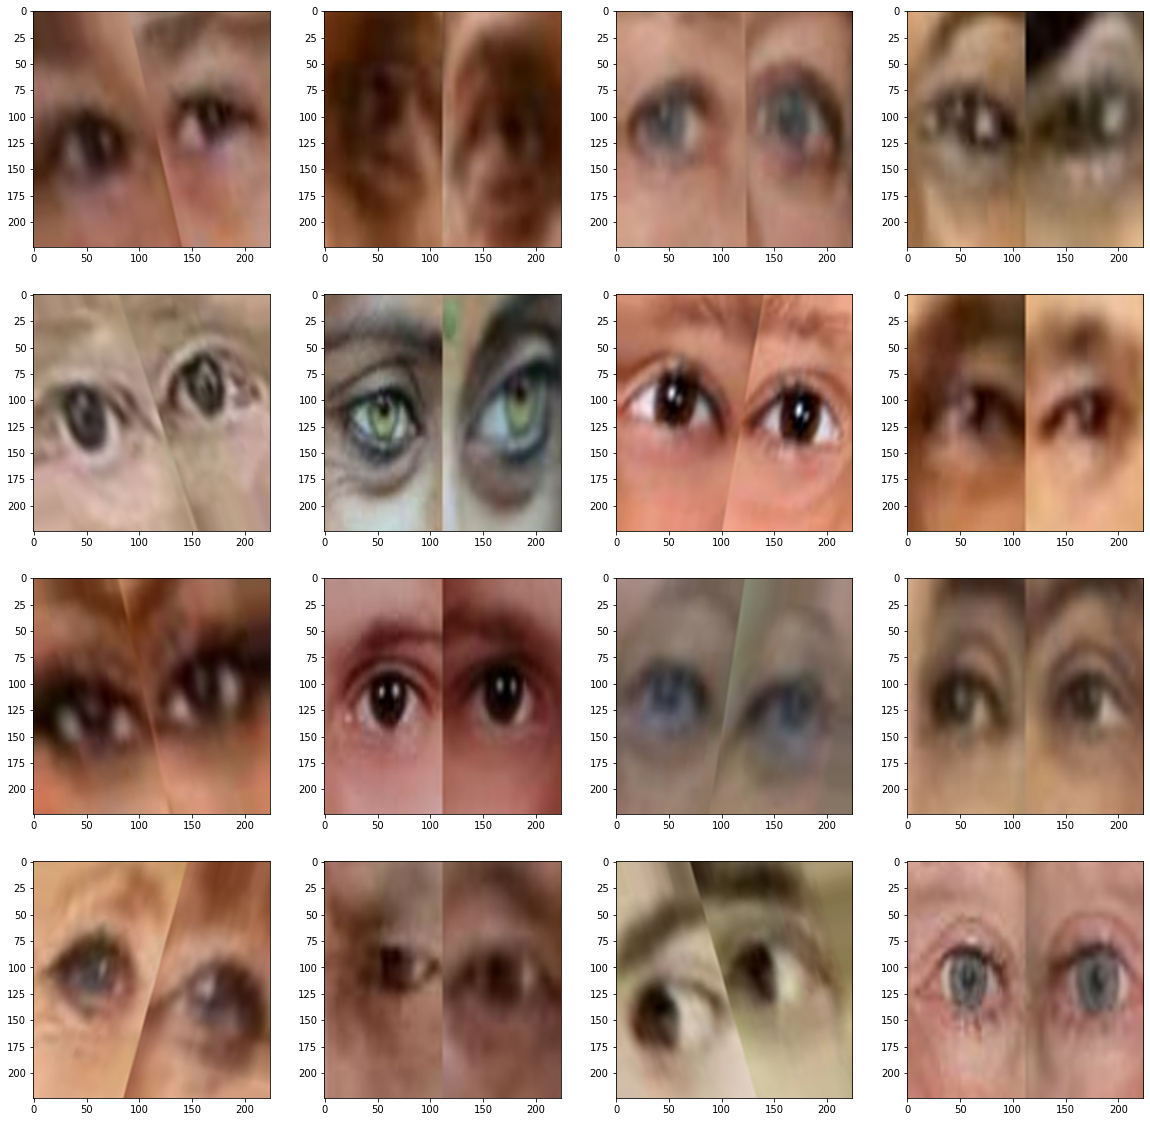

In [47]:
from skimage import io
for i in range(3):
    x1,y1 = next(train_generator)
    y1_int = np.argmax(y1,axis=-1)
 
#Plot the batch images w.r.t. the dataset images.
plt.figure(figsize=(20,20))
idx=1
for i in range(8):
    plt.subplot(4,4,idx)
    idx+=1
    plt.imshow(x1[i].reshape(224,224,3))
    plt.subplot(4,4,idx)
    plt.imshow(io.imread(os.path.join(train_generator.directory,train_generator.filenames[(train_generator.batch_index-1)*32+i])))
    idx+=1

## Training Model From Scratch

In [48]:
from tensorflow.keras.applications import VGG16,VGG19,NASNetLarge,DenseNet201,ResNet50
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import *
from tensorflow.keras.optimizers import Adam

In [49]:
def prepare_model():
    model = Sequential()
    model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224, 224, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))
    model.add(Flatten())
    model.add(Dense(16, activation='relu'))
    model.add(Dense(2, activation='sigmoid'))
    model.compile(loss="binary_crossentropy",optimizer="adam",metrics=['accuracy'])
    return model

In [50]:
model = prepare_model()


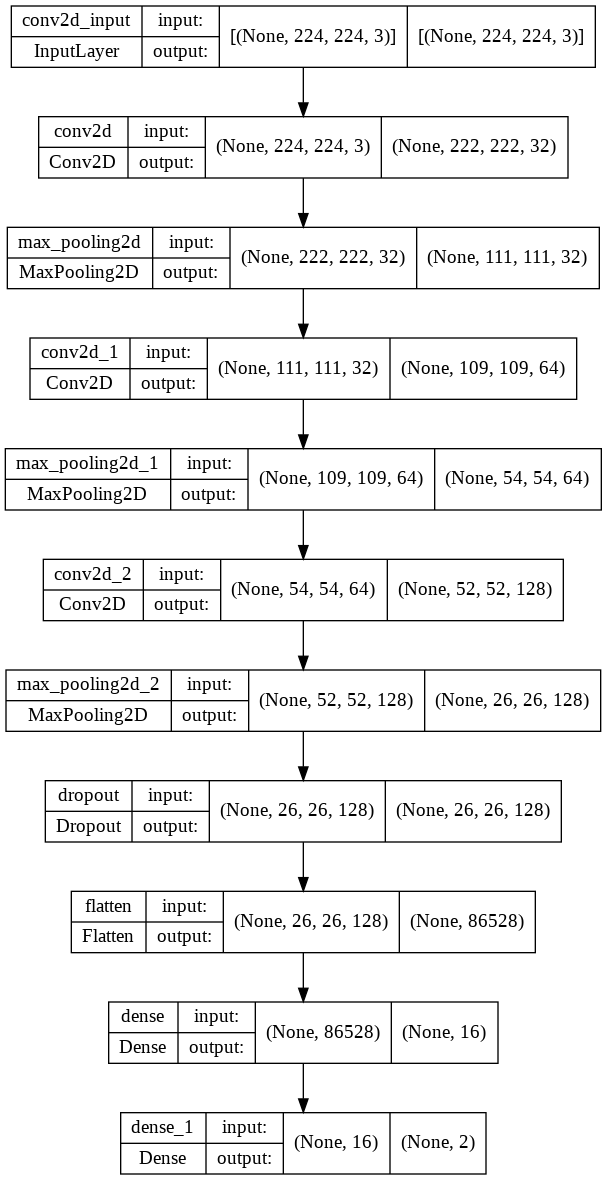

In [51]:
from tensorflow import keras
keras.utils.plot_model(model, show_shapes=True)

## Callbacks

In [52]:
folderpath = "/content/drive/MyDrive/Qualcom/Model/"
filepath = folderpath + "gender_epoch:{epoch:02d}-val_loss:{val_loss:.2f}.hdf5"

In [53]:
cbs = [tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=1,mode='auto', min_lr=1e-5, verbose=1),
      tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-6, patience=5, verbose=1, mode='auto'),
      tf.keras.callbacks.ModelCheckpoint(filepath=filepath, save_weights_only=False, monitor='val_loss', mode='min', save_best_only=True)]

## Train Model

In [54]:
history = model.fit(train_generator,
                    validation_data = train_generator,
                    steps_per_epoch = train_generator.n//train_generator.batch_size,
                    validation_steps = valid_generator.n//valid_generator.batch_size,
                    epochs=25,
                    callbacks=cbs)

Epoch 1/25
280/280 [==============================] - 463s 2s/step - loss: 0.6936 - accuracy: 0.5170 - val_loss: 0.6926 - val_accuracy: 0.5214 - lr: 0.0010
Epoch 2/25
280/280 [==============================] - 41s 146ms/step - loss: 0.6923 - accuracy: 0.5250 - val_loss: 0.6920 - val_accuracy: 0.5268 - lr: 0.0010
Epoch 3/25
280/280 [==============================] - ETA: 0s - loss: 0.6921 - accuracy: 0.5250
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
280/280 [==============================] - 41s 145ms/step - loss: 0.6921 - accuracy: 0.5250 - val_loss: 0.6925 - val_accuracy: 0.5179 - lr: 0.0010
Epoch 4/25
280/280 [==============================] - 40s 144ms/step - loss: 0.6921 - accuracy: 0.5250 - val_loss: 0.6890 - val_accuracy: 0.5643 - lr: 5.0000e-04
Epoch 5/25
280/280 [==============================] - ETA: 0s - loss: 0.6920 - accuracy: 0.5250
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
280/280 [========================

# Transfer Learning

## Define pretrained Base

In [55]:
pretrained_base = DenseNet201(input_shape=(224,224,3), include_top=False, pooling='max',weights='imagenet')

74850304/74836368 [==============================] - 0s 0us/step


In [56]:
pretrained_base.trainable = False

## Attach Head

In [71]:
model = Sequential([
    pretrained_base,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(2, activation='sigmoid'),])

In [72]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet201 (Functional)    (None, 1920)              18321984  
                                                                 
 flatten_2 (Flatten)         (None, 1920)              0         
                                                                 
 dense_6 (Dense)             (None, 512)               983552    
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 128)               65664     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 64)               

## Compile the model

In [73]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=['accuracy'])

## Defiing callbacks

## Arguments

* monitor: quantity to be monitored.
* factor: factor by which the learning rate will be reduced. new_lr = lr * factor.
* patience: number of epochs with no improvement after which learning rate will be reduced.
* verbose: int. 0: quiet, 1: update messages.
* mode: one of {'auto', 'min', 'max'}. In 'min' mode, the learning rate will be reduced when the quantity monitored has stopped decreasing; in 'max' mode it will be reduced when the quantity monitored has stopped increasing; in 'auto' mode, the direction is automatically inferred from the name of the monitored quantity.
* min_delta: threshold for measuring the new optimum, to only focus on significant changes.
* cooldown: number of epochs to wait before resuming normal operation after lr has been reduced.
* min_lr: lower bound on the learning rate.

In [67]:
folderpath = "/content/drive/MyDrive/Qualcom/Model/"
filepath = folderpath + "transfer_epoch:{epoch:02d}-val_loss:{val_loss:.2f}.hdf5"

In [74]:
cbs = [tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=1,mode='auto', min_lr=1e-5, verbose=1),
      tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-6, patience=5, verbose=1, mode='auto'),
      tf.keras.callbacks.ModelCheckpoint(filepath=filepath, save_weights_only=False, monitor='val_loss', mode='min', save_best_only=True)]

* https://keras.io/api/callbacks/model_checkpoint/
* https://keras.io/api/callbacks/reduce_lr_on_plateau/
* https://keras.io/api/callbacks/early_stopping/

## Train the Model

In [ ]:
batch_size = 8
history = model.fit(train_generator,
                    validation_data = train_generator,
                    steps_per_epoch = train_generator.n//train_generator.batch_size,
                    validation_steps = valid_generator.n//valid_generator.batch_size,
                    epochs=100,
                    callbacks=cbs)

Epoch 1/100
280/280 [==============================] - 62s 190ms/step - loss: 0.7741 - accuracy: 0.5513 - val_loss: 0.7278 - val_accuracy: 0.5179 - lr: 0.0010
Epoch 2/100
280/280 [==============================] - 51s 181ms/step - loss: 0.6629 - accuracy: 0.6116 - val_loss: 0.6204 - val_accuracy: 0.6661 - lr: 0.0010
Epoch 3/100
280/280 [==============================] - 51s 182ms/step - loss: 0.6161 - accuracy: 0.6799 - val_loss: 0.5922 - val_accuracy: 0.7536 - lr: 0.0010
Epoch 4/100
280/280 [==============================] - 50s 180ms/step - loss: 0.5810 - accuracy: 0.6978 - val_loss: 0.5537 - val_accuracy: 0.7179 - lr: 0.0010
Epoch 5/100
280/280 [==============================] - 51s 181ms/step - loss: 0.5552 - accuracy: 0.7290 - val_loss: 0.5164 - val_accuracy: 0.7911 - lr: 0.0010
Epoch 6/100
280/280 [==============================] - ETA: 0s - loss: 0.5567 - accuracy: 0.7165
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
280/280 [=======================

## Examine the loss and accuracy

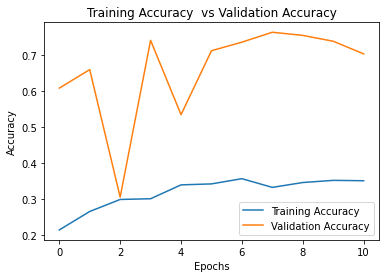

In [ ]:
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.legend()
plt.title('Training Accuracy  vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

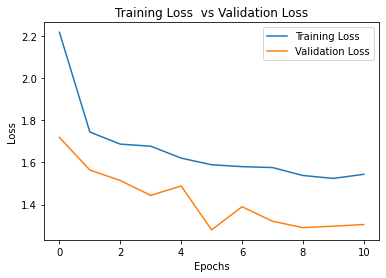

In [ ]:
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.legend()
plt.title('Training Loss  vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

## Evaluate the Model by loading the best model

In [ ]:
chekpoint_filepath = "/content/drive/MyDrive/Qualcom/ModelDenseNet201/epoch:06-val_loss:1.28.hdf5"
model.load_weights(chekpoint_filepath)

In [ ]:
preds = model.predict(val_generator)

221/221 [==============================] - 38s 160ms/step


In [ ]:
predictions = np.argmax(preds,axis=1)

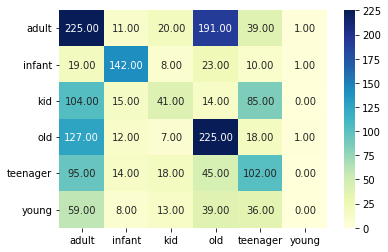

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_val,predictions),
            xticklabels=['adult', 'infant', 'kid', 'old', 'teenager', 'young'],
            yticklabels=['adult', 'infant', 'kid', 'old', 'teenager', 'young'],
            cmap="YlGnBu",
            annot=True,
            fmt=".2f")
plt.show()

## Save the model

In [ ]:
model.save('Densenet201_model.hdf5')

In [ ]:
import shutil
shutil.move("/content/Densenet201_model.hdf5","/content/drive/MyDrive/Qualcom/ModelDenseNet201")

'/content/drive/MyDrive/Qualcom/ModelDenseNet201/Densenet201_model.hdf5'

## Load the saved Model

In [ ]:
from tensorflow.keras.models import load_model
loaded_model = load_model('/content/drive/MyDrive/Qualcom/ModelDenseNet201/Densenet201_model.hdf5')

## Make inference on the test data

In [ ]:
test_data_predictions  = loaded_model.predict(test_generator)

3178/3178 [==============================] - 801s 251ms/step


In [ ]:
test_predictions = np.argmax(test_data_predictions,axis=1)

In [ ]:
file_names = test_generator.filenames

## Prepare Submission File

In [ ]:
import pandas as pd
df_submission = pd.DataFrame({"filename":file_names,"predictions":test_predictions})

In [ ]:
df_submission.head()

,filename,predictions
0,Test/000a7aa8-2726-4af0-a065-a86a316160ec.jpg,1
1,Test/000f5014-6360-42be-9a68-420381d783ca.jpg,3
2,Test/0025e426-98de-46c0-b640-e7e28b06f5bd.jpg,4
3,Test/002adda1-9f83-485d-9242-0e3df2805569.jpg,3
4,Test/004e6a5c-6632-4e7e-b4a9-9efdc5b31ed1.jpg,0


In [ ]:
train_generator.class_indices

{'adult': 0, 'infant': 1, 'kid': 2, 'old': 3, 'teenager': 4, 'young': 5}

In [ ]:
label_dict = {v:k for k,v in train_generator.class_indices.items()}
label_dict

{0: 'adult', 1: 'infant', 2: 'kid', 3: 'old', 4: 'teenager', 5: 'young'}

In [ ]:
df_submission['predictions'] = df_submission['predictions'].map(label_dict)

In [ ]:
df_submission.head()

,filename,predictions
0,Test/000a7aa8-2726-4af0-a065-a86a316160ec.jpg,infant
1,Test/000f5014-6360-42be-9a68-420381d783ca.jpg,old
2,Test/0025e426-98de-46c0-b640-e7e28b06f5bd.jpg,teenager
3,Test/002adda1-9f83-485d-9242-0e3df2805569.jpg,old
4,Test/004e6a5c-6632-4e7e-b4a9-9efdc5b31ed1.jpg,adult
